# Learning About SVD

This notebook is a step by step journey to understanding the Singular Value Decomposition (SVD)

In [1]:
# import numpy for SVD function
import numpy
# import matplotlib.pyplot for visualising arrays
import matplotlib.pyplot as plt

## A Simple Matrix

In [2]:
# create a really simple matrix
A = numpy.array([[-1,1], [1,1]])
# and show it
A

array([[-1,  1],
       [ 1,  1]])

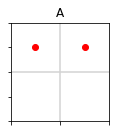

In [3]:
# plot the array
p = plt.subplot(131)
p.axis('scaled'); p.axis([-2, 2, -2, 2]); p.axhline(y=0, color='lightgrey'); p.axvline(x=0, color='lightgrey')
p.set_yticklabels([]); p.set_xticklabels([])

p.set_title("A")
p.plot(A[0,],A[1,],'ro')

plt.show()

## Now Take the SVD

In [4]:
# break it down into an SVD
U, s, V = numpy.linalg.svd(A, full_matrices=False)
S = numpy.diag(s)

In [5]:
# what are U, S and V
print("U =\n", U, "\n")
print("S =\n", S, "\n")
print("V =\n", V, "\n")

U =
 [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]] 

S =
 [[ 1.41421356  0.        ]
 [ 0.          1.41421356]] 

V =
 [[ 1.  0.]
 [ 0.  1.]] 



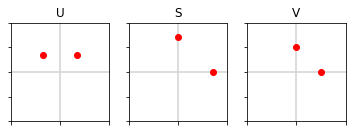

In [6]:
for px in [(131,U, "U"), (132,S, "S"), (133,V, "V")]:
    subplot = px[0]
    matrix = px[1]
    matrix_name = px[2]
    p = plt.subplot(subplot)
    
    p.axis('scaled'); p.axis([-2, 2, -2, 2]); p.axhline(y=0, color='lightgrey'); p.axvline(x=0, color='lightgrey')
    p.set_yticklabels([]); p.set_xticklabels([])

    p.set_title(matrix_name)
    p.plot(matrix[0,],matrix[1,],'ro')
    pass

plt.show()

## Check U, S and V Do Actually Reconstruct A

In [7]:
# rebuild A2 from U.S.V
A2 = numpy.dot(U,numpy.dot(S,V))

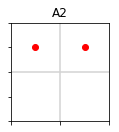

In [8]:
# plot the reconstructed A2
p = plt.subplot(131)
p.axis('scaled'); p.axis([-2, 2, -2, 2]); p.axhline(y=0, color='lightgrey'); p.axvline(x=0, color='lightgrey')
p.set_yticklabels([]); p.set_xticklabels([])

p.set_title("A2")
p.plot(A2[0,],A2[1,],'ro')

plt.show()

Yes, that worked .. the reconstructed A2 is the same as the original A

## Now Reduce Dimensions, And Reconstruct

In [14]:
# S2 is the same as S but with the smaller values removed, here we take the top half of S
S2 = numpy.zeros_like(S)
l = int(len(s)/2)
S2[:l, :l] = S[:l,:l]
# show S2 which has less info than original S
S2

array([[ 1.41421356,  0.        ],
       [ 0.        ,  0.        ]])

In [15]:
# reconstruct A3 from U, S2 and V
A3 = numpy.dot(U, numpy.dot(S2,V))
A3

array([[-1.,  0.],
       [ 1.,  0.]])

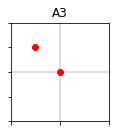

In [16]:
# plot the reconstructed A3
p = plt.subplot(131)
p.axis('scaled'); p.axis([-2, 2, -2, 2]); p.axhline(y=0, color='lightgrey'); p.axvline(x=0, color='lightgrey')
p.set_yticklabels([]); p.set_xticklabels([])

p.set_title("A3")
p.plot(A3[0,],A3[1,],'ro')

plt.show()

We can see the reconstrcuted array in this case is not equiavelent to teh original, we've lost too much information here. In fact, becuase the eigenvalues (those numbers in the diagonal of **S**) were equal, we've actually lost half of the meaningful information.